# Лабораторная работа №2. Решение нелинейных уравнений
## Бегунов Никита
## А-13б-20
### Вариант 21

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Задача 1
**Задание:** Методом простой итерации найти  вещественные корни алгебраического уравнения $P(x) = 0$ с точностью $\varepsilon = 10^{-8}$.  
$P(x) = 1.3x^3+3x^2-2.3x-5.2$

1. Задать функцию $P(x)$ и построить ее график. По графику определить отрезки локализации для каждого корня.

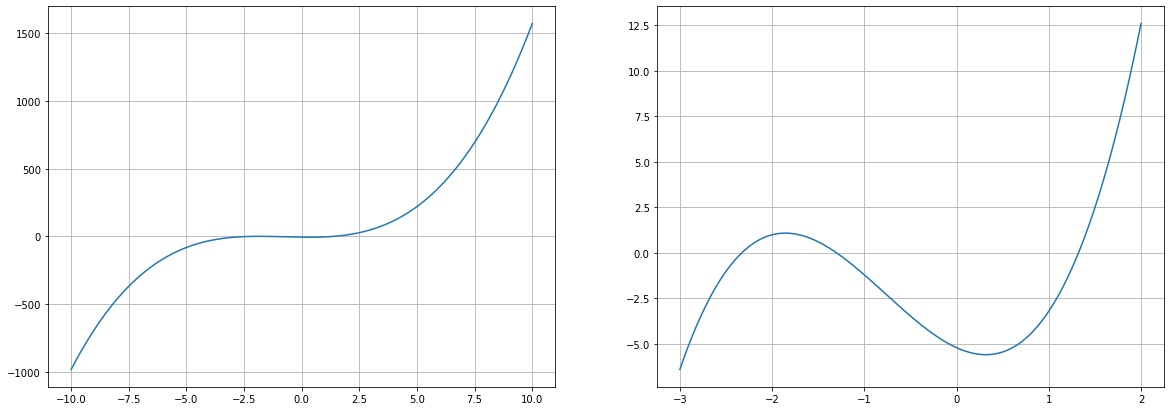

In [2]:
def P(x):
    return 1.3*x**3+3*x**2-2.3*x-5.2

a = -10
b = 10
x_data = np.linspace(a, b, 1000)
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(x_data, P(x_data))
plt.grid()

a = -3
b = 2
x_data = np.linspace(a, b, 1000)
plt.subplot(1, 2, 2)
plt.plot(x_data, P(x_data))
plt.grid()

**1 корень:** $[a, b] = [-3, -2]$  
**2 корень:** $[a, b] = [-2, -1]$  
**3 корень:** $[a, b] = [ 1,  2]$  

2. Задать производную от многочлена $P(x)$ и построить ее график. Проверить, что на отрезках локализации производная функции сохраняет постоянный знак. Если условие не выполнено, то следует уменьшить длину отрезка локализации корня.

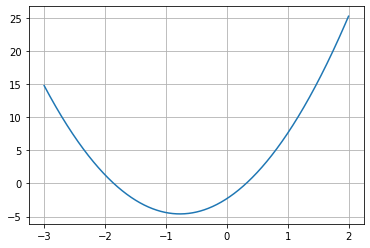

In [3]:
def Derivative(x):
    return 3.9*x**2+6*x-2.3

plt.plot(x_data, Derivative(x_data))
plt.grid()

**1 корень:** $[a, b] = [-3, -2]$  
**2 корень:** $[a, b] = [-1.5, -1]$ - уменьшим отрезок локализации корня, так как производная в точке -2 больше 0, а в точке -1 меньше 0  
**3 корень:** $[a, b] = [ 1,  2]$  

3. Для каждого корня опрелелить итерационны параметр $\alpha$ и параметр $q$, используя формулы:  
$$
\alpha = {2\over{M + m}}, 
M = max_{[a, b]}P'(x), 
m = min_{[a, b]}P'(x), 
q = \big|{{M - m}\over{M + m}}\big|, 
$$  
здесь [a, b] - отрезок локализации корня. Минимумыи максимумы можно найти приближенно, используя график, построенный в п.2.

**1 корень**  
P'(x) положительна и монотонно убывает на [a, b] = [-3, -2]   
$$M_1 = max_{[-3, -2]}P'(x) = P'(-3) = 14.8$$  
$$m_1 = min_{[-3, -2]}P'(x) = P'(-2) = 1.3$$  
$$\alpha_1 = {2\over{M + m}} = {2\over{14.8 + 1.3}} = 0.12$$  
$$q_1 = \big|{{M - m}\over{M + m}}\big| = \big|{{14.8 - 1.3}\over{14.8 + 1.3}}\big| = 0.84$$  
  
**2 корень**  
P'(x) отрицательна и монотонно убывает на [a, b] = [-1.5, -1]   
$$M_2 = max_{[-1.5, -1]}P'(x) = P'(-1.5) = -2.525$$  
$$m_2 = min_{[-1.5, -1]}P'(x) = P'(-1) = -4.4$$  
$$\alpha_2 = {2\over{M + m}} = {2\over{-2.525 - 4.4}} = -0.29$$  
$$q_2 = \big|{{M - m}\over{M + m}}\big| = \big|{{-2.525 + 4.4}\over{-2.525 - 4.4}}\big| = 0.27$$  
  
**3 корень**   
P'(x) положительна и монотонно возрастает на [a, b] = [1, 2]   
$$M_3 = max_{[1, 2]}P'(x) = P'(2) = 25.3$$  
$$m_3 = min_{[1, 2]}P'(x) = P'(1) = 7.6$$  
$$\alpha_3 = {2\over{M + m}} = {2\over{25.3 + 7.6}} = 0.06$$  
$$q_3 = \big|{{M - m}\over{M + m}}\big| = \big|{{25.3 - 7.6}\over{25.3 + 7.6}}\big| = 0.53$$

4. Составить программу для нахождения корня с заданной точностью $\varepsilon$ по методу простой итерации. В качестве  расчетной формулы использовать метод простой итерации с параметром: $$x_{n+1} = x_n - \alpha P(x_n)$$   

In [4]:
def x_next(x, alpha):
    return x - alpha * P(x)

def MethodSimpleIteration(x, alpha, q, eps):
    eps = (1 - q)/q * eps
    prev = x
    x = x_next(prev, alpha)
    i = 1
    while np.abs(x - prev) > eps:
        prev = x
        x = x = x_next(prev, alpha)
        i += 1
    print(f"Число итераций: {i}")
    return x

5. Используя программу найти все корни многочлена с указанной точностью $\varepsilon$. Результаты свести в таблицу.

In [5]:
eps = 10**(-8)
x1 = -2.5
alpha1 = 0.12
q1 = 0.84
print("Первый корень:")
print(MethodSimpleIteration(x1, alpha1, q1, eps))
print()

x2 = -1.25
alpha2 = -0.29
q2 = 0.27
print("Второй корень:")
print(MethodSimpleIteration(x2, alpha2, q2, eps))
print()

x3 = 1.5
alpha3 = 0.06
q3 = 0.53
print("Третий корень:")
print(MethodSimpleIteration(x3, alpha3, q3, eps))
print()

Первый корень:
Число итераций: 21
-2.3303191041914113

Второй корень:
Число итераций: 5
-1.298889299759411

Третий корень:
Число итераций: 13
1.3215160970536908



|Бегунов Никита Сергеевич А-13б-20|            Вариант 21           |
|:--------------------------------|:-------------------------------:|
|Уравнение: $1.3x^3+3x^2-2.3x-5.2$|Точность: $\varepsilon = 10^{-8}$|

|Корни:|[a, b]|M1|m1|$\alpha$|q|Корень с заданной точностью|Число итераций|
|:----------|:--------:|:----:|:--:|:---:|:--:|:---------:|:-:|
|1-ый корень|[-3, -2]  | 14.8 | 1.3| 0.12|0.84|-2.33031910|21|
|2-ой корень|[-1.5, -1]|-2.525|-4.4|-0.29|0.27|-1.29888930| 5|
|3-ий корень| [1, 2]   | 25.3 | 7.6| 0.06|0.53| 1.32151610|13|

**Вывод:** благодаря проделанным вычислениям с помощью метода простых итераций мне удалось найти корни уравнения $P(x) = 1.3x^3+3x^2-2.3x-5.2 = 0$ с точностью $\varepsilon = 10^{-8}$ и посчитать количество итераций для вычисления каждого корня.

## Задача 2  
**Задание:** Дано уравнение $f(x) = 0$. Найти все корни уравнения с заданной точностью $\varepsilon = 10^{-12}$ на указанном отрезке [a, b]. Для решения задачи сипользовать метод Ньютона и метод, указанный в индивидуальном варианте. Сравнить количество итераций, потребовавшихся для достижения заданной точности каждым методом.
$f(x) = 3x^2sin(x^2) - sin(2x) - 0.3$  
$[a, b] = [-2, 2]$  
Метод решения: Метод секущих  

1. Локализовать корни уравнения.

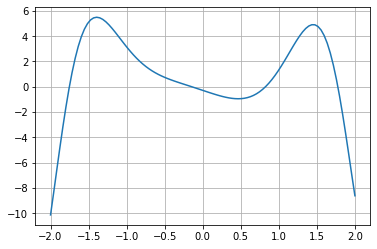

In [6]:
def f(x):
    return 3*(x**2)*np.sin(x**2) - np.sin(2*x) - 0.3

a = -2
b = 2
x_data = np.linspace(a, b, 100)
plt.plot(x_data, f(x_data))
plt.grid()

**1 корень:** $[a, b] = [-2, -1.5]$  
**2 корень:** $[a, b] = [-0.5, 0 ]$  
**3 корень:** $[a, b] = [ 0.5, 1 ]$  
**4 корень:** $[a, b] = [ 1.5, 2 ]$  

2. Составить программу вычисления корня методом Ньютона, предусмотрев в ней подсчет числа итераций. Найти с заданной точностью корни уравнения на указанном в задании отрезке [a, b].

In [7]:
def f_derivative(x):
    return 6*(x**2)*np.sin(x**2) + 6*(x**3)*np.cos(x**2) - 2*np.cos(2*x)

def NewtonsMethod(x, eps):
    prev = x
    x = x - f(x)/f_derivative(x)
    i = 1
    while np.abs(x - prev) > eps:
        prev = x
        x = x - f(x)/f_derivative(x)
        i += 1
    print(f"Число итераций: {i}")
    return x

print("Первый корень:")
print(NewtonsMethod(x1, eps))
print()

x2 = (-0.5 - 0)/2
print("Второй корень:")
print(NewtonsMethod(x2, eps))
print()

x3 = (0.5 + 1)/2
print("Третий корень:")
print(NewtonsMethod(x3, eps))
print()

x4 = (1.5 + 2)/2
print("Четвертый корень:")
print(NewtonsMethod(x4, eps))
print()

Первый корень:
Число итераций: 5
-2.5196639458012493

Второй корень:
Число итераций: 6
-0.1515178608077071

Третий корень:
Число итераций: 9
0.8270223890725099

Четвертый корень:
Число итераций: 5
1.7753699757757884



3. Составить программу вычисления корня методом, указанным в индивидуальном варианте (методом секущих), предусмотрев в нем подсчет числа итераций. Найти с заданной точностью $\varepsilon$ те же корни уравнения, что в п.2.

In [8]:
def SecantMethod(prev, x, eps):
    prevprev = prev
    x = x - f(x)*(x - prev)/(f(x) - f(prev))
    i = 1
    while np.abs(x - prev) > eps:
        prevprev = prev
        prev = x
        x = x - f(x)*(x - prevprev)/(f(x) - f(prevprev))
        i += 1
    print(f"Число итераций: {i}")
    return x

eps = 10**(-12)
prev1 = -1.7
x1 = (-2 - 1.5)/2
print("Первый корень:")
print(SecantMethod(prev1, x1, eps))
print()

prev2 = -0.3
x2 = (-0.5 - 0)/2
print("Второй корень:")
print(SecantMethod(prev2, x2, eps))
print()

prev3 = 0.7
x3 = (0.5 + 1)/2
print("Третий корень:")
print(SecantMethod(prev3, x3, eps))
print()

prev4 = 1.7
x4 = (1.5 + 2)/2
print("Четвертый корень:")
print(SecantMethod(prev4, x4, eps))
print()

Первый корень:
Число итераций: 5
-1.7522620396378794

Второй корень:
Число итераций: 5
-0.1515178608061512

Третий корень:
Число итераций: 7
0.8270223889640246

Четвертый корень:
Число итераций: 6
1.7753699757755748



4. Сравнить результаты проведенных расчётов, сведя их в таблицу.

**Уравнение** $$f(x) = 3x^2sin(x^2) - sin(2x) - 0.3 $$  
Расчетная формула метода Ньютона: $$x_{n+1} = x_n - {{f(x_n)}\over{f'(x_n)}}$$  
Расчетная формула метода секущих: $$x_{n+1} = x_n - {{x_{n-1} - x_n}\over{f(x_{n-1}) - f(x_n)}}f(x_n)$$  

|Корни уравнения  |Число итераций метод Ньютона|Число итераций метода Секущих|
|:----------------|:--------------------------:|:---------------------------:|
|x=-1.752262039638|             9              |              5              |
|x=-0.151517860806|             8              |              5              |
|x= 0.827022388964|            13              |              7              |
|x= 1.775369975776|             6              |              6              |

5. Модифицировать методы так, чтобы каждый метод делал заданное количество итераций и на каждом шаге сохранял значение модуля невязки $r_n = |f(x_n)|$. Методы должны возвращать массив, хранящий значения $r_n$. Для каждого корня вызвать модифицированные методы так, чтобы они проделали 10 итераций. Построить графики зависимости $r_n$ от n, $n = 0..10$, в логарифмической шкале. Каждому корню должно соответствовать одно изображение, на котором нарисованы зависимости для двух методов. Полученный результат объясните.  
Примечание: для построения графика в логарифмической шкале воспользуйтесь командой plt.yscale(‘log’).

C:\Users\assas\AppData\Local\Temp/ipykernel_4688/3272852159.py:23: RuntimeWarning: invalid value encountered in double_scalars
  x = x - f(x)*(x - prevprev)/(f(x) - f(prevprev))


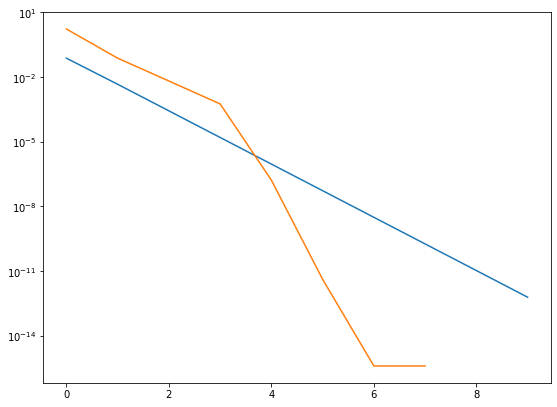

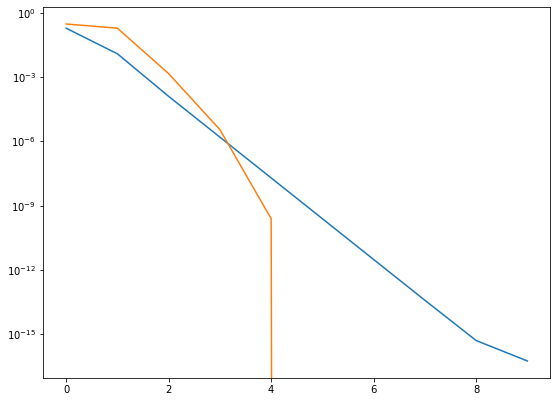

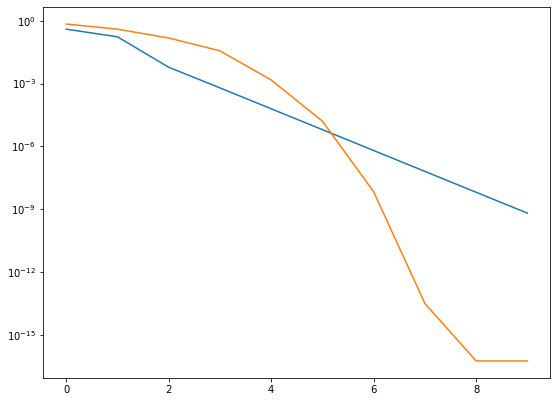

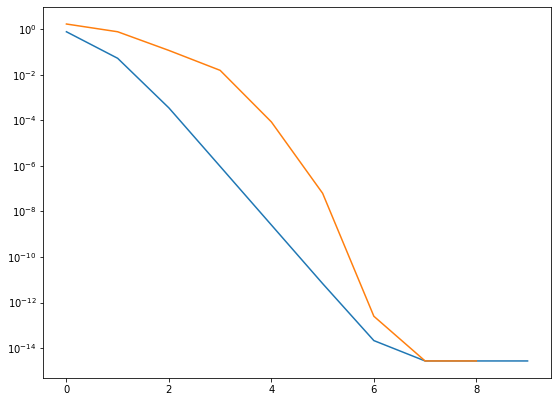

In [9]:
def ModNewtonsMethod(x, eps):
    arr = []
    arr.append(np.abs(f(x)))
    prev = x
    x = x - f(x)/f_derivative(x)
    arr.append(np.abs(f(x)))
    for i in range(8):
        prev = x
        x = x - f(x)/f_derivative(x)
        arr.append(np.abs(f(x)))
    return arr

def ModSecantMethod(prev, x, eps):
    arr = []
    arr.append(np.abs(prev))
    arr.append(np.abs(f(x)))
    prevprev = prev
    x = x - f(x)*(x - prev)/(f(x) - f(prev))
    arr.append(np.abs(f(x)))
    for i in range(7):
        prevprev = prev
        prev = x
        x = x - f(x)*(x - prevprev)/(f(x) - f(prevprev))
        arr.append(np.abs(f(x)))
    return arr

eps = 10**(-12)
x_data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

prev1 = -1.7
x1 = (-2 - 1.5)/2
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
arr = ModNewtonsMethod(x1, eps)
plt.plot(x_data, arr)
arr = ModSecantMethod(prev1, x1, eps)
plt.plot(x_data, arr)
plt.yscale("log")

prev2 = -0.3
x2 = (-0.5 - 0)/2
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 2)
arr = ModNewtonsMethod(x2, eps)
plt.plot(x_data, arr)
arr = ModSecantMethod(prev2, x2, eps)
plt.plot(x_data, arr)
plt.yscale("log")

prev3 = 0.7
x3 = (0.5 + 1)/2
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 3)
arr = ModNewtonsMethod(x3, eps)
plt.plot(x_data, arr)
arr = ModSecantMethod(prev3, x3, eps)
plt.plot(x_data, arr)
plt.yscale("log")

prev4 = 1.7
x4 = (1.5 + 2)/2
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 4)
arr = ModNewtonsMethod(x4, eps)
plt.plot(x_data, arr)
arr = ModSecantMethod(prev4, x4, eps)
plt.plot(x_data, arr)
plt.yscale("log")

**Вывод:** мне удалось определить корни уравнения $f(x) = 3x^2sin(x^2) - sin(2x) - 0.3$ на отрезке $[a, b] = [-2, 2]$ с точностью $\varepsilon = 10^{-12}$ с помощью метода Ньютона и метода секущих.  
$x1 = -1.752262039638 ± 10^{-12}$  
$x2 = -0.151517860806 ± 10^{-12}$  
$x3 =  0.827022388964 ± 10^{-12}$  
$x4 =  1.775369975776 ± 10^{-12}$  
Из графиков видно, что в данном уравнении метод секущих сходится к заданной точности в большинстве случаев быстрее метода Ньютона.

## Задание 3
**Задание:** найти корни уравнения и определить их кратность.  
$f(x) = 4arctg({{x-1}\over{x+1}}) - 4x + x^2 + 3$

1. Локализуем корни уравнения.

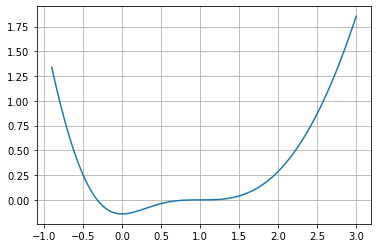

In [10]:
def f(x):
    return 4*np.arctan((x-1)/(x+1)) - 4 * x + x**2 + 3

a = -0.9
b = 3
x_data = np.linspace(a, b, 1000)
plt.plot(x_data, f(x_data))
plt.grid()

**1 корень:** [a, b] = [-0.5, 0]  
**2 корень:** [a, b] = [0.5, 1.5] - кратный

2. Используя метод Ньютона для кратных корней по числу итераций найдем первый корень, а также значение и кратность второго.

In [11]:
def f_derivative(x):
    return 4/(x**2 + 1) - 4 + 2*x

def NewtonsMethodMultipleRoots(x, eps, m):
    prev = x
    x = x - f(x)/f_derivative(x)
    i = 1
    while np.abs(x - prev) > eps:
        prev = x
        x = x - m * f(x)/f_derivative(x)
        i += 1
    print(f"Число итераций: {i}")
    return x

eps = 10**(-6)
x1 = -0.25
print("Первый корень:")
print(NewtonsMethodMultipleRoots(x1, eps, 1))
print()

print("Второй корень:")
x2 = 0.99
for i in range(1, 6):
    print(NewtonsMethodMultipleRoots(x2, eps, i))
    print()

Первый корень:
Число итераций: 4
-0.3180192649729164

Второй корень:
Число итераций: 19
0.9999962719771316

Число итераций: 19
0.999998931421303

Число итераций: 3
1.0000000597694343

Число итераций: 8
0.9999915108803151

Число итераций: 17
1.0000105070387346



У второго корня наименьшее количество итераций получилось при m = 3, поэтому можно сказать, что этот корень имеет кратность равную 3.

**Вывод:** с помощью метода Ньютона для кратных корней мне удалось найти корни уравнения $f(x) = 4arctg({{x-1}\over{x+1}}) - 4x + x^2 + 3$ и определить их кратность  
$x1 = -0.318019 ± 10^{-6}$ - имеет кратность 1  
$x2 =  1.000000 ± 10^{-6}$ - имеет кратность 3